# Real-Time Data Analysis

In [ ]:
import requests
city = 'Ahmedabad'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '835351db22b35af3e7aa10b489a72fdf56685580'
main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 58,
 'attributions': [{'logo': 'India-CPCB.png',
   'name': 'CPCB - India Central Pollution Control Board',
   'url': 'http://cpcb.nic.in/'},
  {'name': 'World Air Quality Index Project', 'url': 'https://waqi.info/'}],
 'city': {'geo': [22.9987886, 72.6029661],
  'name': 'Maninagar, Ahmedabad, India',
  'url': 'https://aqicn.org/city/india/ahmedabad/maninagar'},
 'debug': {'sync': '2021-05-19T13:11:52+09:00'},
 'dominentpol': 'pm25',
 'forecast': {'daily': {'o3': [{'avg': 22,
     'day': '2021-05-17',
     'max': 38,
     'min': 9},
    {'avg': 21, 'day': '2021-05-18', 'max': 36, 'min': 9},
    {'avg': 22, 'day': '2021-05-19', 'max': 33, 'min': 13},
    {'avg': 23, 'day': '2021-05-20', 'max': 61, 'min': 7},
    {'avg': 23, 'day': '2021-05-21', 'max': 39, 'min': 17},
    {'avg': 19, 'day': '2021-05-22', 'max': 31, 'min': 12},
    {'avg': 15, 'day': '2021-05-23', 'max': 16, 'min': 12}],
   'pm10': [{'avg': 28, 'day': '2021-05-17', 'max': 36, 'min': 18},
    {'avg': 35, 'day': '20

In [ ]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']
iaqi
for i in iaqi.items():
  print(i[0],':',i[1]['v'])

co : 3.3
dew : 25
h : 17.256
no2 : 14.9
o3 : 14.1
pm10 : 190
pm25 : 58
so2 : 3.3
t : 26
w : 9.17
wg : 12.8


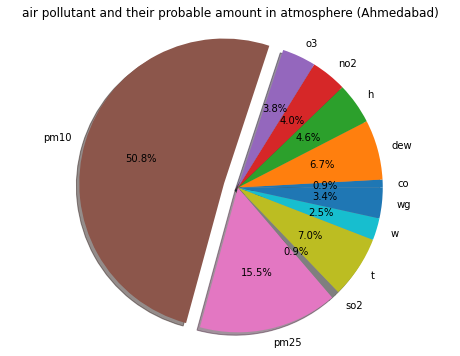

In [ ]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

explode = [0 for i in pollutants]
mx = values.index(max(values))      #explode 1st slice
explode[mx] = 0.1

#plot 
plt.figure(figsize=(8,6))
plt.pie(values,labels= pollutants, explode = explode, autopct='%1.1f%%', shadow = True)

plt.title('air pollutant and their probable amount in atmosphere (Ahmedabad)')

plt.axis('equal')
plt.show()

# Historical Data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/maninagar,-ahmedabad-air-quality.csv'

df = pd.read_csv(csv_path)

df


,date,pm25,pm10,o3,no2,so2,co
0,2021/4/1,121,159,55,31,42,11
1,2021/4/2,150,222,55,31,36,13
2,2021/4/3,155,106,55,28,18,12
3,2021/4/4,143,166,48,24,16,9
4,2021/4/5,96,200,44,24,13,13
...,...,...,...,...,...,...,...
1631,2017/10/17,,,,59,41,2
1632,2016/7/13,,,,45,27,10
1633,2016/7/24,,,,43,27,10
1634,2015/11/2,,,,11,20,9


In [ ]:
df = df.rename(columns = {' pm25' : 'pm2.5',
                          ' pm10' : 'pm10',
                          ' o3' : 'o3',
                          ' no2' : 'no2',
                          ' so2' : 'so2',
                          ' co' : 'co'})
df.columns

df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2019-01-01']
df21 = df21.sort_values(by='date')
df21


,date,pm2.5,pm10,o3,no2,so2,co
751,2019-01-02,210,,34,35,28,4
752,2019-01-03,200,,37,43,34,4
753,2019-01-04,177,,51,51,41,5
754,2019-01-05,183,,34,33,26,4
755,2019-01-06,156,,37,34,24,4
...,...,...,...,...,...,...,...
23,2021-04-24,150,92,59,29,15,13
24,2021-04-25,125,93,55,24,15,12
25,2021-04-26,130,112,44,18,20,4
26,2021-04-27,142,52,38,20,18,7


In [ ]:
df21.replace(' ', '0', inplace=True)
df21

,date,pm2.5,pm10,o3,no2,so2,co
751,2019-01-02,210,0,34,35,28,4
752,2019-01-03,200,0,37,43,34,4
753,2019-01-04,177,0,51,51,41,5
754,2019-01-05,183,0,34,33,26,4
755,2019-01-06,156,0,37,34,24,4
...,...,...,...,...,...,...,...
23,2021-04-24,150,92,59,29,15,13
24,2021-04-25,125,93,55,24,15,12
25,2021-04-26,130,112,44,18,20,4
26,2021-04-27,142,52,38,20,18,7


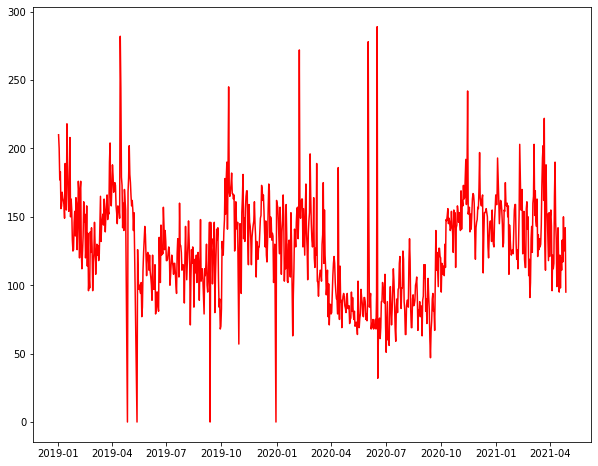

In [ ]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm2.5']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates,pm25, color='red')
plt.show()